In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [6]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<h1>WORKING ON  THE 'GarageQual' COLUMN</h1>

<h3>-Checking the values in each column before imputation</h3>

<Axes: xlabel='GarageQual'>

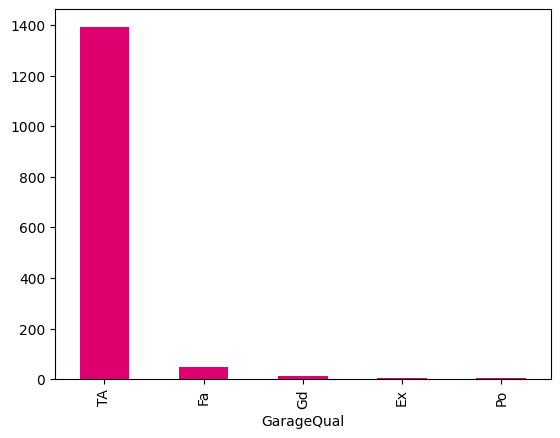

In [18]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar(color='#DE006F')

In [11]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

<h3>-Visualizing the column before filling the missing values</h3>

Text(0.5, 1.0, 'GarageQual')

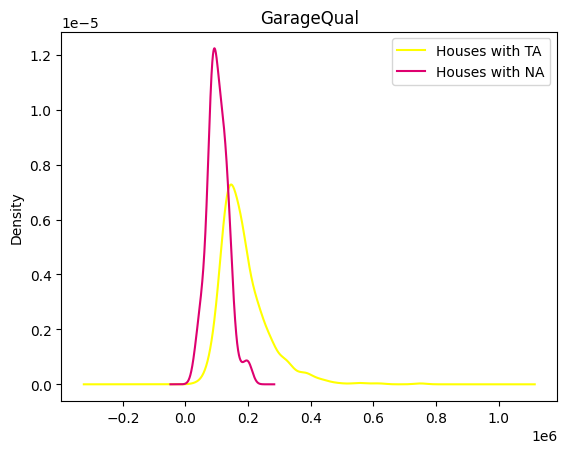

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='yellow')

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='#DE006F')

lines,labels=ax.get_legend_handles_labels()
labels=['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [20]:
#house with TA is less peaked

In [21]:
temp=df[df['GarageQual']=='TA']['SalePrice']

<h3>REPLACING MISSING VALUES WITH MODE</h3>

In [22]:
df['GarageQual'].fillna('TA',inplace=True)

<h3>-Checking the values in each column after imputation</h3>

<Axes: xlabel='GarageQual'>

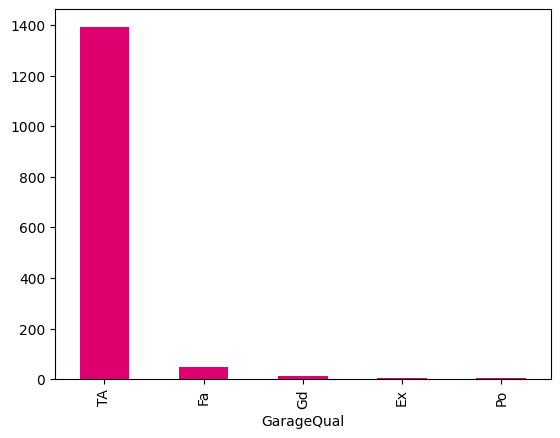

In [19]:
df['GarageQual'].value_counts().plot(kind='bar',color='#DE006F')
#The value of TA increased just a bit

<h3>-Visualizing the column after filling the missing values</h3>

Text(0.5, 1.0, 'GarageQual')

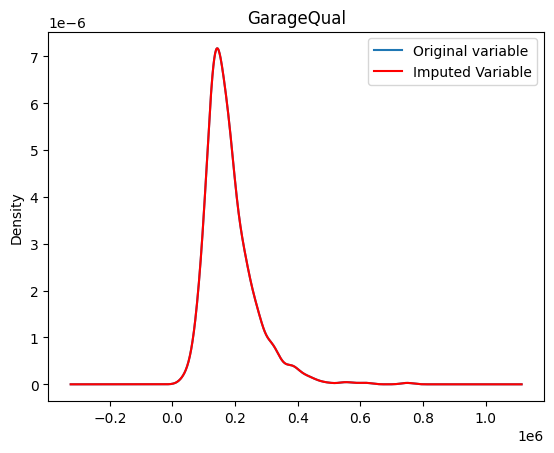

In [23]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Original variable','Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')



<h1>2. WORKING ON  THE 'FireplaceQu' COLUMN</h1>

<h3>-Checking the values in each column before imputation</h3>

<Axes: xlabel='FireplaceQu'>

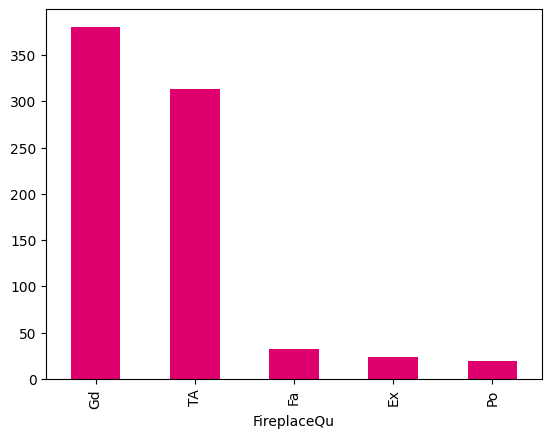

In [25]:
df['FireplaceQu'].value_counts().plot(kind='bar',color='#DE006F')
#by looking at the graph, we can see that there is not one value that dominates, 
#there are two values that have almost equal values, thus this is not good for 'mode imputation'

In [27]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

<h3>-Visualizing the column before filling the missing values</h3>

Text(0.5, 1.0, 'FireplaceQu')

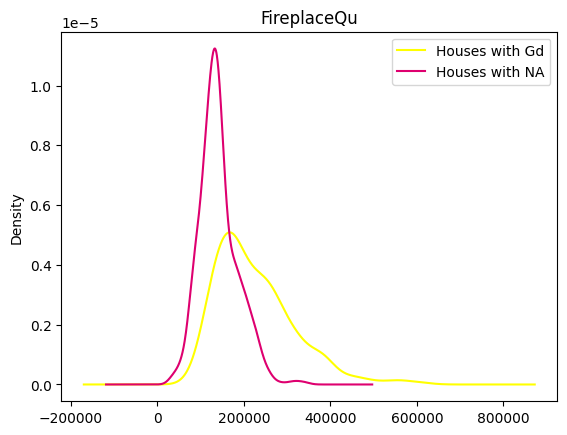

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='yellow')

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='#DE006F')

lines,labels=ax.get_legend_handles_labels()
labels=['Houses with Gd','Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [31]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

<h3>REPLACING MISSING VALUES WITH MODE</h3>

In [33]:
df['FireplaceQu'].fillna('Gd',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1128\891419280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace=True)


<h3>-Checking the values in each column after imputation</h3>

<Axes: xlabel='FireplaceQu'>

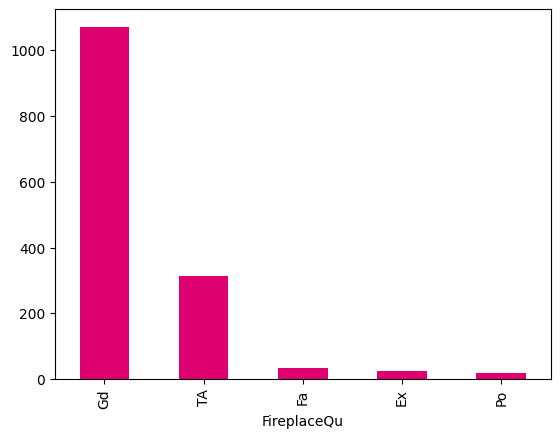

In [35]:
df['FireplaceQu'].value_counts().plot(kind='bar',color='#DE006F')

Text(0.5, 1.0, 'FireplaceQu')

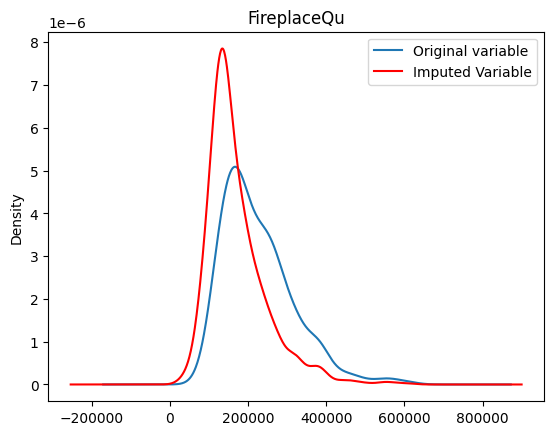

In [36]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Original variable','Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

#not an equal distribution because a lot values were missing and because gd was not dominant

<h1>USING SKLEARN</h1>

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [40]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')


In [41]:
X_train=imputer.fit_transform(X_train)
X_test=imputer.fit_transform(X_test)

In [42]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)